In [1]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

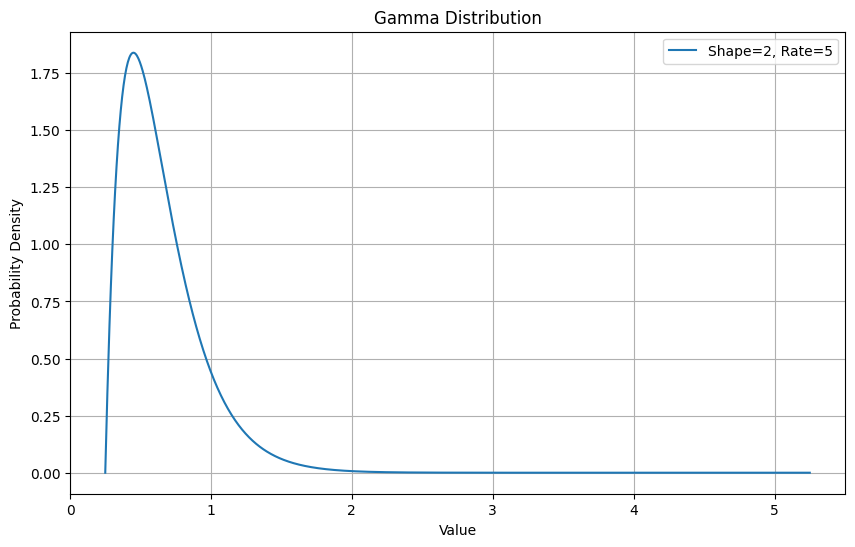

In [12]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import gamma

# Parameters for the gamma distribution
shape, rate = 2, 5  # shape is alpha, rate is beta

# Generate values
x = np.linspace(0, 5, 1000)
x_shifted = x + 0.25
y = gamma.pdf(x, shape, scale=1/rate)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_shifted, y, label=f'Shape={shape}, Rate={rate}')
plt.title('Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
df_new = pd.read_csv('../Cleaning_Engineering/added_demand_estimates_eta_variation.csv')
df_new.head()

,cab_type,source,destination,car_type,weekday,rush_hour,is_raining,temp_groups,surge_multiplier,price,base_price,estimated_eta,estimated_a,estimated_b,estimated_demand
0,Lyft,Financial District,Fenway,Luxury SUV,1,0,0,40,1.0,38.5,26.0,0.000008,33.301254,19.999783,53.300062
1,Lyft,Financial District,South Station,Luxury SUV,1,0,0,40,1.0,26.0,26.0,0.000008,33.301254,19.999783,53.300167
2,Uber,Financial District,Fenway,Luxury SUV,1,0,0,40,1.0,37.0,26.0,0.000008,33.301254,19.999783,53.300073
3,Lyft,Financial District,Fenway,Luxury SUV,1,0,0,40,1.5,62.5,26.0,0.000008,33.301254,19.999783,53.299932
4,Lyft,Financial District,Northeastern University,Luxury SUV,1,0,0,40,1.0,38.5,26.0,0.000008,33.301254,19.999783,53.300062


In [19]:
round(df_new.describe(), 2)

,weekday,rush_hour,is_raining,temp_groups,surge_multiplier,price,base_price,estimated_eta,estimated_a,estimated_b,estimated_demand
count,6594711.00,6594711.00,6594711.00,6594711.00,6594711.00,6594711.00,6594711.00,6594711.00,6594711.00,6594711.00,6594711.00
mean,0.71,0.15,0.15,35.08,1.01,16.55,11.92,0.38,5.03,14.30,19.33
std,0.45,0.36,0.36,7.25,0.09,9.48,7.83,0.26,10.03,5.19,13.59
min,0.00,0.00,0.00,20.00,1.00,2.50,2.50,0.00,0.00,6.19,6.19
25%,0.00,0.00,0.00,30.00,1.00,9.00,6.50,0.00,0.00,9.36,9.36
50%,1.00,0.00,0.00,40.00,1.00,13.50,10.50,0.50,0.00,15.13,15.13
75%,1.00,0.00,0.00,40.00,1.00,22.50,16.00,0.56,3.80,20.00,23.80
max,1.00,1.00,1.00,50.00,3.00,97.50,29.50,0.76,35.31,20.00,55.31


In [20]:
df_new.sample(10)

,cab_type,source,destination,car_type,weekday,rush_hour,is_raining,temp_groups,surge_multiplier,price,base_price,estimated_eta,estimated_a,estimated_b,estimated_demand
1678125,Lyft,West End,North End,Luxury,0,0,0,30,1.25,19.5,10.5,0.712827,0.009225,19.943245,19.944355
1372588,Lyft,Fenway,Beacon Hill,Luxury,1,1,0,40,1.00,16.5,16.5,0.000042,5.868240,19.999777,25.867325
103389,Lyft,Fenway,West End,Luxury SUV,1,0,0,40,1.00,32.5,28.5,0.000015,32.572329,19.999594,52.570181
1415071,Uber,Fenway,Back Bay,Luxury,1,0,0,30,1.00,15.0,13.5,0.000043,5.868837,19.999776,25.867936
966115,Lyft,Northeastern University,West End,Luxury SUV,1,0,0,40,1.00,30.0,28.5,0.000017,30.526038,19.999583,50.523863
3664008,Lyft,Haymarket Square,West End,Shared,0,0,0,40,1.00,3.5,2.5,0.438472,0.000856,6.187584,6.188078
5517067,Uber,North End,Beacon Hill,Base,1,0,0,20,1.00,9.0,7.0,0.510111,0.003055,8.934795,8.935791
3662611,Uber,Haymarket Square,Theatre District,Shared,0,0,0,30,1.00,7.0,2.5,0.438472,0.000856,6.187584,6.187949
276156,Lyft,Haymarket Square,Back Bay,Luxury SUV,1,1,0,30,1.00,30.0,26.0,0.000210,17.310695,19.996764,37.295097
4581881,Uber,Boston University,Back Bay,Shared,1,0,0,30,1.00,7.5,2.5,0.461885,0.001141,8.005925,8.006375


In [11]:
import pandas as pd
import numpy as np
import os

In [23]:
eta_df = pd.read_csv('../Pipeline/Data/estimated_eta_added.csv')
eta_df.head()

,distance,cab_type,source,destination,name,car_type,weekday,rush_hour,temp,clouds,...,humidity,wind,is_raining,temp_groups,surge_multiplier,price,estimated_eta,estimated_a,estimated_b,estimated_demand
0,3.01,Uber,North Station,Boston University,Black SUV,Luxury SUV,1,0,40.51,1.00,...,0.92,1.35,0,40,1.0,35.0,0.000301,34.518257,19.99128,54.472641
1,3.01,Uber,North Station,Boston University,Black SUV,Luxury SUV,1,0,40.51,1.00,...,0.92,1.35,0,40,1.0,32.5,0.000301,34.518257,19.99128,54.473410
2,3.01,Uber,North Station,Boston University,Black SUV,Luxury SUV,1,0,40.54,1.00,...,0.92,1.42,0,40,1.0,35.0,0.000301,34.518257,19.99128,54.472641
3,3.15,Lyft,North Station,Boston University,Lux Black XL,Luxury SUV,1,1,41.10,0.97,...,0.92,1.82,0,40,1.0,34.0,0.000301,34.518257,19.99128,54.472942
4,3.09,Lyft,North Station,Boston University,Lux Black XL,Luxury SUV,1,1,41.10,0.97,...,0.92,1.82,0,40,1.0,32.5,0.000301,34.518257,19.99128,54.473410


In [24]:
surge_eta_df = eta_df[eta_df['surge_multiplier'] != 1.0]
no_surge_eta_df = eta_df[eta_df['surge_multiplier'] == 1.0]

In [25]:
# price = base_price * (1 + estimated_eta * estimated_demand)
# base_price = price / (1 + estimated_eta * estimated_demand)

def rev_base_price(row):
    return row['price'] / (1 + row['estimated_eta'] * row['estimated_demand'])

surge_eta_df['base_price'] = surge_eta_df.apply(rev_base_price, axis=1)
no_surge_eta_df['base_price'] = no_surge_eta_df.apply(rev_base_price, axis=1)

surge_eta_df['price_diff'] = surge_eta_df['price'] - surge_eta_df['base_price']
no_surge_eta_df['price_diff'] = no_surge_eta_df['price'] - no_surge_eta_df['base_price']

/var/folders/ym/g7y_9d4j7q9d413s_kdqly_m0000gn/T/ipykernel_23305/1308053445.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surge_eta_df['base_price'] = surge_eta_df.apply(rev_base_price, axis=1)
/var/folders/ym/g7y_9d4j7q9d413s_kdqly_m0000gn/T/ipykernel_23305/1308053445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_surge_eta_df['base_price'] = no_surge_eta_df.apply(rev_base_price, axis=1)
/var/folders/ym/g7y_9d4j7q9d413s_kdqly_m0000gn/T/ipykernel_23305/1308053445.py:10: SettingWithCopyWarning:

In [26]:
surge_eta_df['price_diff'].describe()

count    20975.000000
mean         9.531648
std          9.358192
min          0.087162
25%          0.494316
50%          8.630501
75%         17.444087
max         58.279945
Name: price_diff, dtype: float64

In [27]:
no_surge_eta_df['price_diff'].describe()

count    617001.000000
mean          7.059071
std           5.531686
min           0.050287
25%           1.154406
50%           6.759392
75%          10.938054
max          54.178585
Name: price_diff, dtype: float64

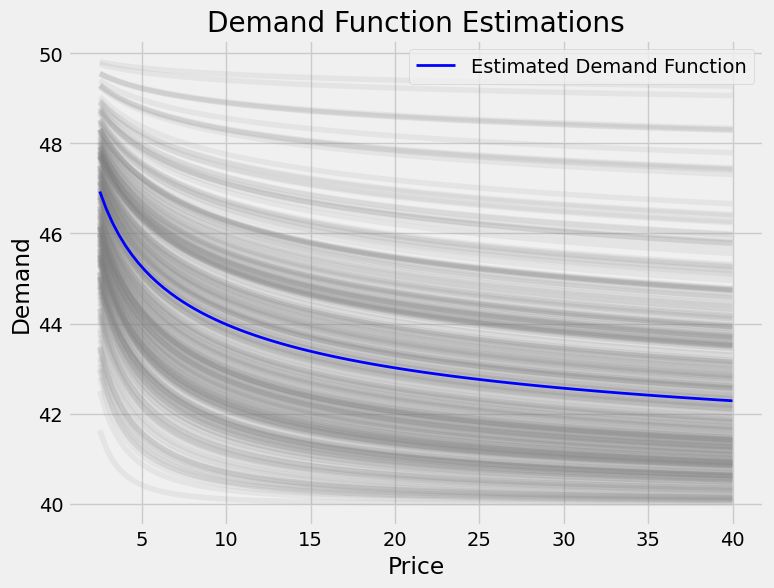

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Constants
a = 10
b = 40
eta_fixed = 0.4
price_range = np.linspace(2.5, 40, 100)  # Prices from 2.5 to 40

# Gamma distribution for eta
shape, rate = 3, 6
eta_random = gamma.rvs(shape, scale=1/rate, size=300)

# Plotting the demand curves
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))

# 200 random eta values to create grey lines with transparency
for eta in eta_random:
    demand = a * price_range ** (-eta) + b
    plt.plot(price_range, demand, color='grey', alpha=0.1)

# Fixed eta value to create the blue line
demand_fixed = a * price_range ** (-eta_fixed) + b
plt.plot(price_range, demand_fixed, label='Estimated Demand Function', color='blue', linewidth=2)

# Finalizing the plot
plt.title('Demand Function Estimations')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.__version__

'3.7.4'